# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 11 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 11, is characterized by a different temperature or a limited set of temperatures (if you need more than 11 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

### Exercise 10.2

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

---
## Risoluzione
---

In questo esercizio ho deciso di implementare la **Parallelizzazione** degli **Argoritmi Genetici** per cercare il miglior percorso che passi per i $110$ Capoluoghi di provincia italiani. L'algoritmo di base rimane quindi lo stesso algoritmo genetico dell'Esercizio 9 che viene operato parallelamente su diversi *continenti* dove le evoluzioni delle popolazioni procedono indipendentemente l'una dall'altra, eccezion fatta per un numero limitato di **Migrazioni** degli elementi migliori delle popolazioni di ciascun continente.

Queste migrazioni, che trasferisco i migliori elementi di un continente verso un altro scelto in modo casuale, fanno sì che ci sia uno scambio di informazione tra i diversi processi di ricerca andando ad arrichire le possibilità esplorate in ciascun singolo continente. In generale queste migrazioni potrebbero introdurre anche del rumore nel patrimonio genetico di una popolazione ma l'algoritmo di selezione è tale da mantenere i cambiamenti (che siano mutazioni o migrazioni) che diminuiscono la loss e da dare un ruolo marginale a quelli meno favorevoli.

Viene confrontato quindi dell'evoluzione nel caso in si hanno $13$ migrazioni intervallate da $50$ generazioni con il caso in cui l'evoluzione di ciascuno continente prosegue in maniera totalmente indipendente.

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'figure.figsize': [12.0, 6.0],
    'axes.labelsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'font.size':10,
    'savefig.directory':'./Images'
})

In [60]:
c=[]
c.append(np.loadtxt("FILE/PATH/element_699_0_13.txt",delimiter='\t',skiprows=0))
c.append(np.loadtxt("FILE/PATH/element_699_0_0.txt",delimiter='\t',skiprows=0))

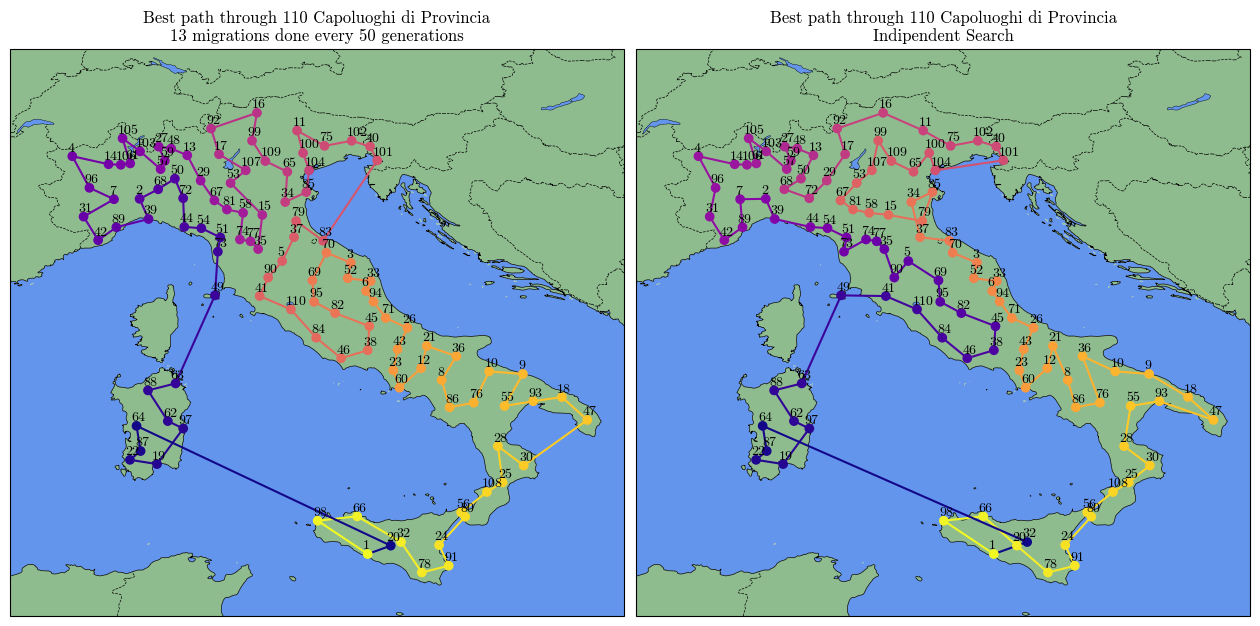

In [61]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,8), subplot_kw={'projection': ccrs.PlateCarree()}, gridspec_kw={'wspace': 0.02})

for i in range(2) :
    axs[i].set_extent([6, 19, 36, 48], crs=ccrs.PlateCarree())
    axs[i].add_feature(cfeature.OCEAN, facecolor='cornflowerblue')
    axs[i].add_feature(cfeature.LAND, facecolor='darkseagreen')
    axs[i].add_feature(cfeature.COASTLINE, lw=0.5)
    axs[i].add_feature(cfeature.BORDERS, linestyle='--', lw=0.5)
    axs[i].add_feature(cfeature.LAKES, edgecolor='black', facecolor='cornflowerblue', linewidth=0.3)
    x = c[i][:,1]
    y = c[i][:,2]
    l = c[i][:,0]
    f = np.arange(len(x))
    axs[i].scatter(x,y,c=f,cmap='plasma_r',zorder=2)
    cmap = plt.get_cmap('plasma_r')
    colors = cmap(f/f.max())
    for j,txt in enumerate(l):
        axs[i].annotate(int(txt),(x[j]-0.1,y[j]+0.1))
        axs[i].plot(x[j:j+2],y[j:j+2],color=colors[j])
    axs[i].plot([x[-1],x[0]],[y[-1],y[0]],color=colors[-1],zorder=1)

axs[0].set_title('Best path through 110 Capoluoghi di Provincia\n13 migrations done every 50 generations')
axs[1].set_title('Best path through 110 Capoluoghi di Provincia\nIndipendent Search')
plt.show()

In [62]:
f0=pd.read_csv('FILE/loss_0.txt',sep='\t')
f13=pd.read_csv('FILE/loss_13.txt',sep='\t')

Il miglioramento è appena percettibile, come si può osservare anche dall'andamento della **Loss function**, in cui si nota qualche miglioramento leggermente più ampio del previsto in corrispondenza di alcune delle migrazioni, segno quindi di un arrichimento (in positivo) del patrimonio genetico della popolazione grazie all'immigrazione di un elemento da un altro continente.

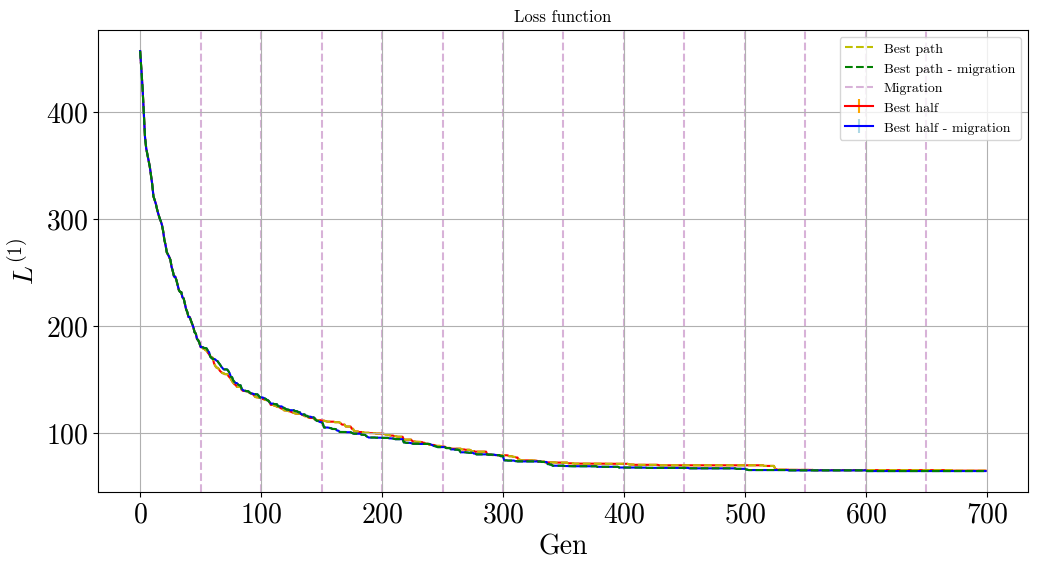

In [70]:
plt.errorbar(f0['Gen'],f0['Mean'],f0['Err'],color='r',ecolor='orange',label='Best half',zorder=0)
plt.plot(f0['Gen'],f0['Best'],linestyle='--',color='y',label='Best path',zorder=1)
plt.errorbar(f13['Gen'],f13['Mean'],f13['Err'],color='b',ecolor='lightblue',label='Best half - migration',zorder=2)
plt.plot(f13['Gen'],f13['Best'],linestyle='--',color='g',label='Best path - migration',zorder=3)
for i in range(0,13):
    a = plt.axvline(x=50*(i+1),linestyle='--',color='purple',alpha=0.3,zorder=-1)
a.set_label('Migration')
plt.legend()
plt.ylabel('$L^{(1)}$')
plt.xlabel('Gen')
plt.title('Loss function')
plt.grid()
plt.show()

Vengono riportati per confronto i paragoni in presenza o meno delle migrazioni anche per la ricerca del miglior percorso attraverso delle città disposte su una circonferenza e dentro un quadrato. In generale anche in questo caso la differenza è appena percettibile; per il caso quadrato è stato riportato un esempio in cui però la ricerca parallela ma non del tutto indipendente ha portato a un miglioramento più evidente rispetto al caso di ricerca totalmente indipendente.

In [64]:
c=np.loadtxt("CIRCLE/PATH/element_299_0_0.txt",delimiter='\t',skiprows=0)
d=np.loadtxt("CIRCLE/PATH/element_299_0_5.txt",delimiter='\t',skiprows=0)

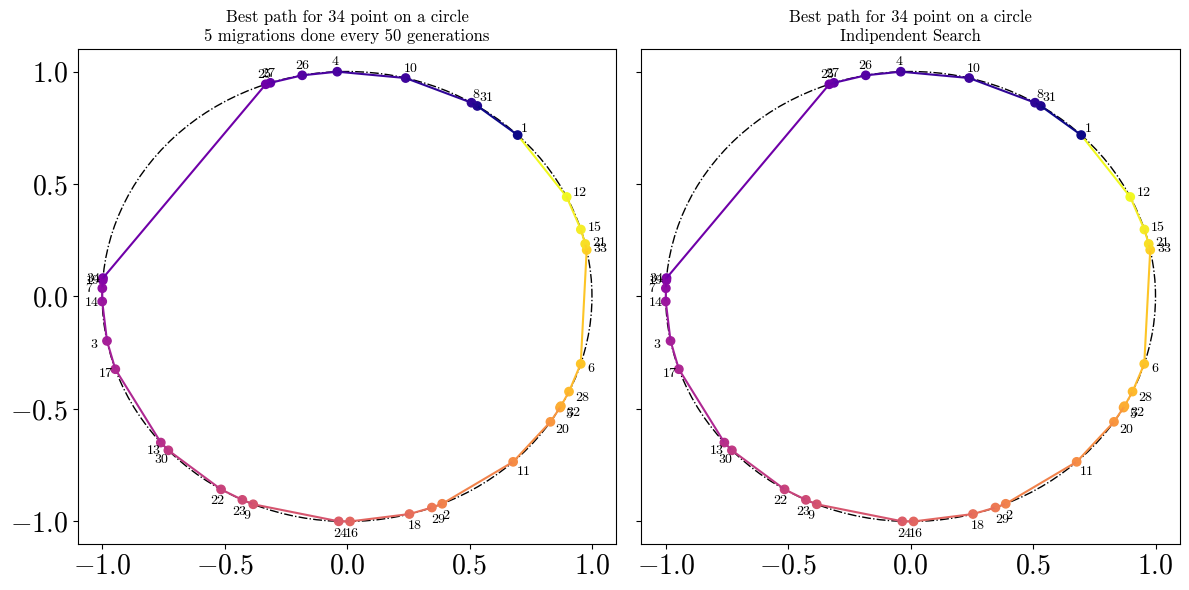

In [65]:
fig, ax = plt.subplots(1,2,figsize=(12,6),sharey='row')

x = d[:,1]
y = d[:,2]
l = d[:,0]
f = np.arange(len(x))
ax[0].scatter(x,y,c=f,cmap='plasma',zorder=2)
cmap = plt.get_cmap('plasma')
colors = cmap(f/f.max())
circle1 = plt.Circle((0,0),1,color='black',linestyle='-.',fill=False,zorder=0)
for i,txt in enumerate(l):
    ax[0].annotate(int(txt),(x[i]*1.05-0.02,y[i]*1.05-0.02))
    ax[0].plot(x[i:i+2],y[i:i+2],color=colors[i])
ax[0].plot([x[-1],x[0]],[y[-1],y[0]],color=colors[-1],zorder=1)
ax[0].add_patch(circle1)
ax[0].set_title('Best path for 34 point on a circle\n5 migrations done every 50 generations')

x = c[:,1]
y = c[:,2]
l = c[:,0]
ax[1].scatter(x,y,c=f,cmap='plasma',zorder=2)
circle1 = plt.Circle((0,0),1,color='black',linestyle='-.',fill=False,zorder=0)
for i,txt in enumerate(l):
    ax[1].annotate(int(txt),(x[i]*1.05-0.02,y[i]*1.05-0.02))
    ax[1].plot(x[i:i+2],y[i:i+2],color=colors[i])
ax[1].plot([x[-1],x[0]],[y[-1],y[0]],color=colors[-1],zorder=1)
ax[1].add_patch(circle1)
ax[1].set_title('Best path for 34 point on a circle\nIndipendent Search')

fig.tight_layout()


In [66]:
sp0=np.loadtxt("SQUARE/PATH/element_299_0_0.txt",delimiter='\t',skiprows=0)
sp5=np.loadtxt("SQUARE/PATH/element_299_0_5.txt",delimiter='\t',skiprows=0)

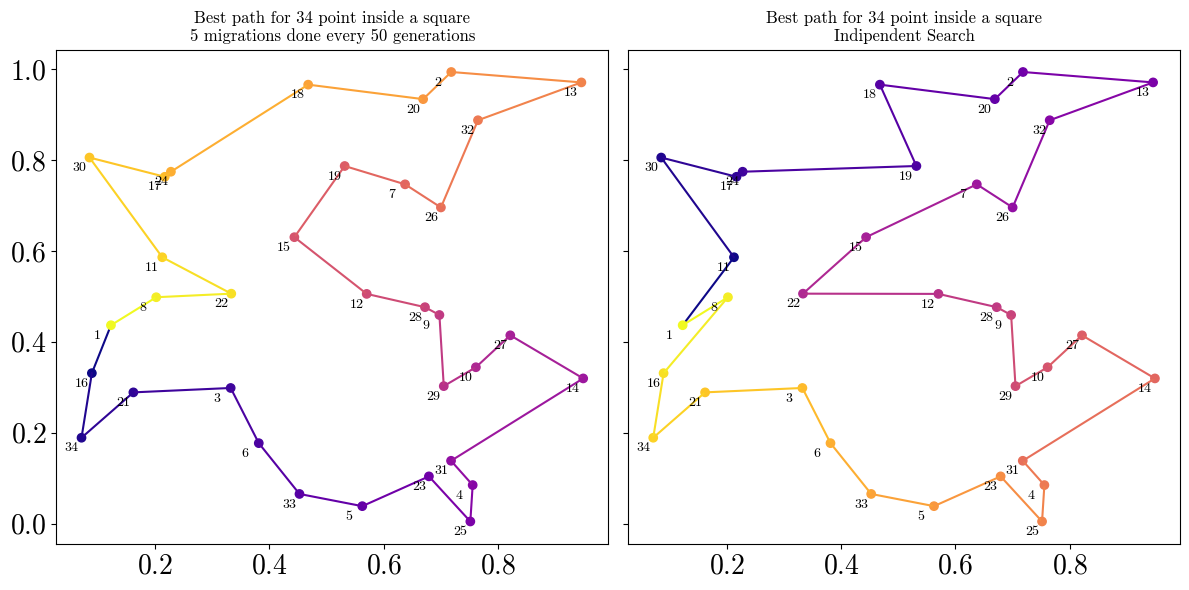

In [67]:
fig, ax = plt.subplots(1,2,figsize=(12,6),sharey='row')
x = sp5[:,1]
y = sp5[:,2]
l = sp5[:,0]
f = np.arange(len(x))
ax[0].scatter(x,y,c=f,cmap='plasma_r',zorder=2)
cmap = plt.get_cmap('plasma_r')
colors = cmap(f/f.max())
for i,txt in enumerate(l):
    ax[0].annotate(int(txt),(x[i]-0.03,y[i]-0.03))
    ax[0].plot(x[i:i+2],y[i:i+2],color=colors[i])
ax[0].plot([x[-1],x[0]],[y[-1],y[0]],color=colors[-1],zorder=1)
ax[0].set_title('Best path for 34 point inside a square\n5 migrations done every 50 generations')

x = sp0[:,1]
y = sp0[:,2]
l = sp0[:,0]
f = np.arange(len(x))
ax[1].scatter(x,y,c=f,cmap='plasma_r',zorder=2)
for i,txt in enumerate(l):
    ax[1].annotate(int(txt),(x[i]-0.03,y[i]-0.03))
    ax[1].plot(x[i:i+2],y[i:i+2],color=colors[i])
ax[1].plot([x[-1],x[0]],[y[-1],y[0]],color=colors[-1],zorder=1)
ax[1].set_title('Best path for 34 point inside a square\nIndipendent Search')

plt.tight_layout()

In [68]:
c0=pd.read_csv('CIRCLE/loss_0.txt',sep='\t')
c5=pd.read_csv('CIRCLE/loss_5.txt',sep='\t')
s0=pd.read_csv('SQUARE/loss_0.txt',sep='\t')
s5=pd.read_csv('SQUARE/loss_5.txt',sep='\t')

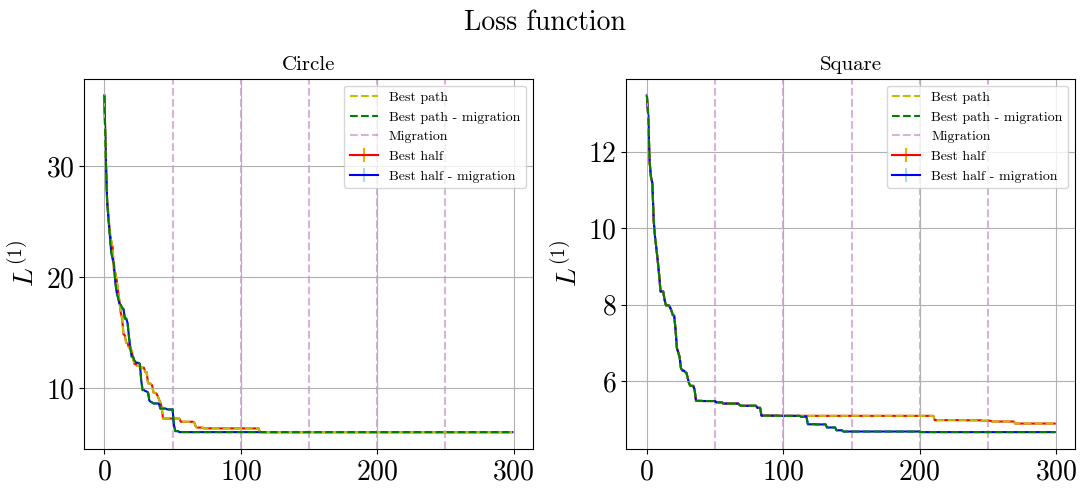

In [71]:
plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
plt.plot(c0['Gen'],c0['Best'],linestyle='--',color='y',label='Best path',zorder=2)
plt.errorbar(c0['Gen'],c0['Mean'],c0['Err'],color='r',ecolor='orange',label='Best half',zorder=0)
plt.plot(c5['Gen'],c5['Best'],linestyle='--',color='g',label='Best path - migration',zorder=3)
plt.errorbar(c5['Gen'],c5['Mean'],c5['Err'],color='b',ecolor='lightblue',label='Best half - migration',zorder=1)
for i in range(0,5):
    a = plt.axvline(x=50*(i+1),linestyle='--',color='purple',alpha=0.3,zorder=-1)
a.set_label('Migration')
plt.legend()
plt.ylabel('$L^{(1)}$')
plt.grid()
plt.title('Circle',fontsize=15)

plt.subplot(1,2,2)
plt.plot(s0['Gen'],s0['Best'],linestyle='--',color='y',label='Best path',zorder=2)
plt.errorbar(s0['Gen'],s0['Mean'],s0['Err'],color='r',ecolor='orange',label='Best half',zorder=0)
plt.plot(s5['Gen'],s5['Best'],linestyle='--',color='g',label='Best path - migration',zorder=3)
plt.errorbar(s5['Gen'],s5['Mean'],s5['Err'],color='b',ecolor='lightblue',label='Best half - migration',zorder=1)
for i in range(0,5):
    a = plt.axvline(x=50*(i+1),linestyle='--',color='purple',alpha=0.3,zorder=-1)
a.set_label('Migration')
plt.legend()
plt.ylabel('$L^{(1)}$')
plt.grid()
plt.title('Square',fontsize=15)

plt.suptitle('Loss function',fontsize=20)
plt.tight_layout()
plt.show()

Anche in questo caso si possono notare alcuni miglioramenti eccezionali della loss in corrispondenza di eventi di migrazione.

### Codice
La struttura del codice è rimasta sostanzialmente invariata rispetto all'Esercizio 9 e le poche variazioni rigurdano la parallelizazione del codice e l'implementazione del metodo `population::Migration()`.
La struttura del `main.cpp` ne risulta quindi leggermente modificata:
```cpp
    for(int k=0;k<f;k++){
        test.Mutate();
        test.Evolve();
        test.Select();

        test.Check();
        test.Sort();
        if(rank == 0){
            test.Print(nm,k);
            test.L2(nm,k);
            Progress_Bar(k,f);
        }
        if(k%a == 0) test.Migration(rank,size,m);
    }
```
La parallelizazione del codice è stata implementata con l'utilizzo della libreria `mpi.h` e viene quindi inizializzata come segue:
```cpp
    int size, rank;
    MPI_Init(&argc,&argv);
    MPI_Comm_size(MPI_COMM_WORLD, &size);
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
```

Resta quindi da discutere unicamente il funzionamento del metodo `population::Migration()`. Il metodo rappresenta un punto di contatto e compromesso tra l'implementazione della classe fatta nell'Esercizio 9 e le esigenze dei metodi di `mpi` riguardanti principalmente i *datatype* delle informazioni condivise:
```cpp
void population::Migration(int rank, int cores, int n) {
    
    int dim = _pop[0].N();
    mat sends(dim,n);
    mat recvs(dim,cores*n);

    for(int i=0;i<dim;i++) {
        for(int j=0;j<n;j++) sends(i,j) = _pop[j](i).Id();
    }
    MPI_Gather(sends.memptr(), dim * n, MPI_DOUBLE, recvs.memptr(), dim * n, MPI_DOUBLE, 0, MPI_COMM_WORLD);
    
    if(rank == 0) recvs = shuffle(recvs,1);

    MPI_Bcast(recvs.memptr(), dim * cores * n, MPI_DOUBLE, 0, MPI_COMM_WORLD);
    for(int j=0;j<n;j++){
        vec a = recvs.col(rank + j);
        _pop[j].Rebuild(a);
    }
};
```
Il metodo permette la migrazione verso un continente casuale degli <span style="color:purple">**n**</span> migliori elementi di ciascun continente sfruttando i metodi `MPI_Gather` e `MPI_Bcast` che tratteranno però solo i *_label* dei `gene` dei migliori `element` e non `gene` nella sua interezza:
- i *_label* dei *dim* `geni` degli *n* migliori `element` di ciascun continente vengono salvati in `mat sends(dim,n)`
- tramite `MPI_Gather` tutti i processi condividono il proprio `sends` con il processo `rank=0` che memorizza i `sends` in `mat recvs(dim,cores*n)` 
- il processo `rank=0` opera uno `shuffle` su `recvs` e poi attraverso `MPI_Bcast` la condivide con tutti gli altri processi
- ogni processo legge le colonne di `recvs` di sua attinenza e attraverso una variante di `element::Rebuild()` accoglie i nuovi elementi immigrati ricostruendoli a partire dai *_label* letti.


Riporto il metodo `element::Rebuild()` qui utilizzato in cui si sfrutta un'altra volta la possibilità di utilizzare *lambda functions* nel metodo `std::sort()` della classe `vector`:
```cpp
void element::Rebuild(vec labs){
    if(labs.size() != _dim) cerr<<"Wrong indexes' vector size"<<endl;
    else{
        sort(_dna.begin(),_dna.end(),[labs](gene& a, gene& b){
            return a.Search(labs) < b.Search(labs);
        });
    }
    Check();
};
```